## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Loading Dataset

In [3]:
# loading the dataset to pandas DataFrame
df = pd.read_csv("ip project.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# printing the first 5 rows of the dataframe
df.head()

,Title,Authors,Publication Year,Total Citations,Average per Year,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,RNA-Seq: a revolutionary tool for transcriptomics,"Wang, Zhong; Gerstein, Mark; Snyder, Michael",2009,5424,493.09,0,0,0,0,0,...,0,69,223,341,469,579,699,702,717,685
1,Network biology: Understanding the cell's func...,"Barabasi, AL; Oltvai, ZN",2004,4202,262.63,0,0,0,0,43,...,248,326,285,316,359,313,335,317,329,319
2,The fundamental role of epigenetic events in c...,"Jones, PA; Baylin, SB",2002,3855,214.17,0,0,22,158,190,...,262,263,284,292,270,237,245,205,184,195
3,APPLICATIONS OF NEXT-GENERATION SEQUENCING Seq...,"Metzker, Michael L.",2010,3395,339.50,0,0,0,0,0,...,0,0,148,343,444,408,438,448,433,346
4,Micrornas: Small RNAs with a big role in gene ...,"He, L; Hannon, GJ",2004,3343,208.94,0,0,0,0,10,...,119,144,177,206,265,285,80,280,390,470


In [6]:
# number of rows and columns
df.shape

(3121, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3121 non-null   object 
 1   Authors           3121 non-null   object 
 2   Publication Year  3121 non-null   int64  
 3   Total Citations   3121 non-null   int64  
 4   Average per Year  3121 non-null   float64
 5   2000              3121 non-null   int64  
 6   2001              3121 non-null   int64  
 7   2002              3121 non-null   int64  
 8   2003              3121 non-null   int64  
 9   2004              3121 non-null   int64  
 10  2005              3121 non-null   int64  
 11  2006              3121 non-null   int64  
 12  2007              3121 non-null   int64  
 13  2008              3121 non-null   int64  
 14  2009              3121 non-null   int64  
 15  2010              3121 non-null   int64  
 16  2011              3121 non-null   int64  


### Clean up Text

In [8]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [9]:
df["cleaned_authors"] = df["Authors"].apply(lambda x: clean_text(x))
df.head()

,Title,Authors,Publication Year,Total Citations,Average per Year,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,cleaned_authors
0,RNA-Seq: a revolutionary tool for transcriptomics,"Wang, Zhong; Gerstein, Mark; Snyder, Michael",2009,5424,493.09,0,0,0,0,0,...,69,223,341,469,579,699,702,717,685,wang zhong gerstein mark snyder michael
1,Network biology: Understanding the cell's func...,"Barabasi, AL; Oltvai, ZN",2004,4202,262.63,0,0,0,0,43,...,326,285,316,359,313,335,317,329,319,barabasi al oltvai zn
2,The fundamental role of epigenetic events in c...,"Jones, PA; Baylin, SB",2002,3855,214.17,0,0,22,158,190,...,263,284,292,270,237,245,205,184,195,jones pa baylin sb
3,APPLICATIONS OF NEXT-GENERATION SEQUENCING Seq...,"Metzker, Michael L.",2010,3395,339.50,0,0,0,0,0,...,0,148,343,444,408,438,448,433,346,metzker michael l
4,Micrornas: Small RNAs with a big role in gene ...,"He, L; Hannon, GJ",2004,3343,208.94,0,0,0,0,10,...,144,177,206,265,285,80,280,390,470,he l hannon gj


### Determine most-frequent words, remove stop words

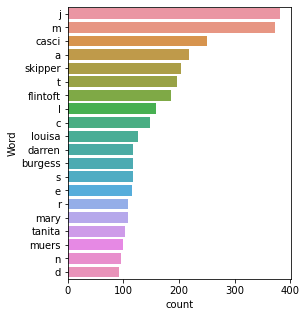

In [10]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(4,5)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(df['cleaned_authors'],20)

In [11]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words = ("a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z")

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['finalcleaned_authors'] = df['cleaned_authors'].apply(lambda x: remove_stopwords(x))

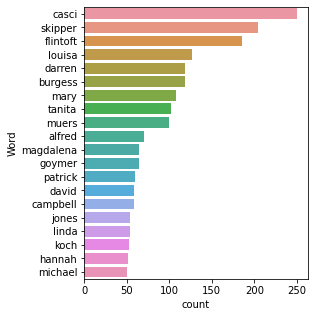

In [12]:
freq_words(df["finalcleaned_authors"],20)

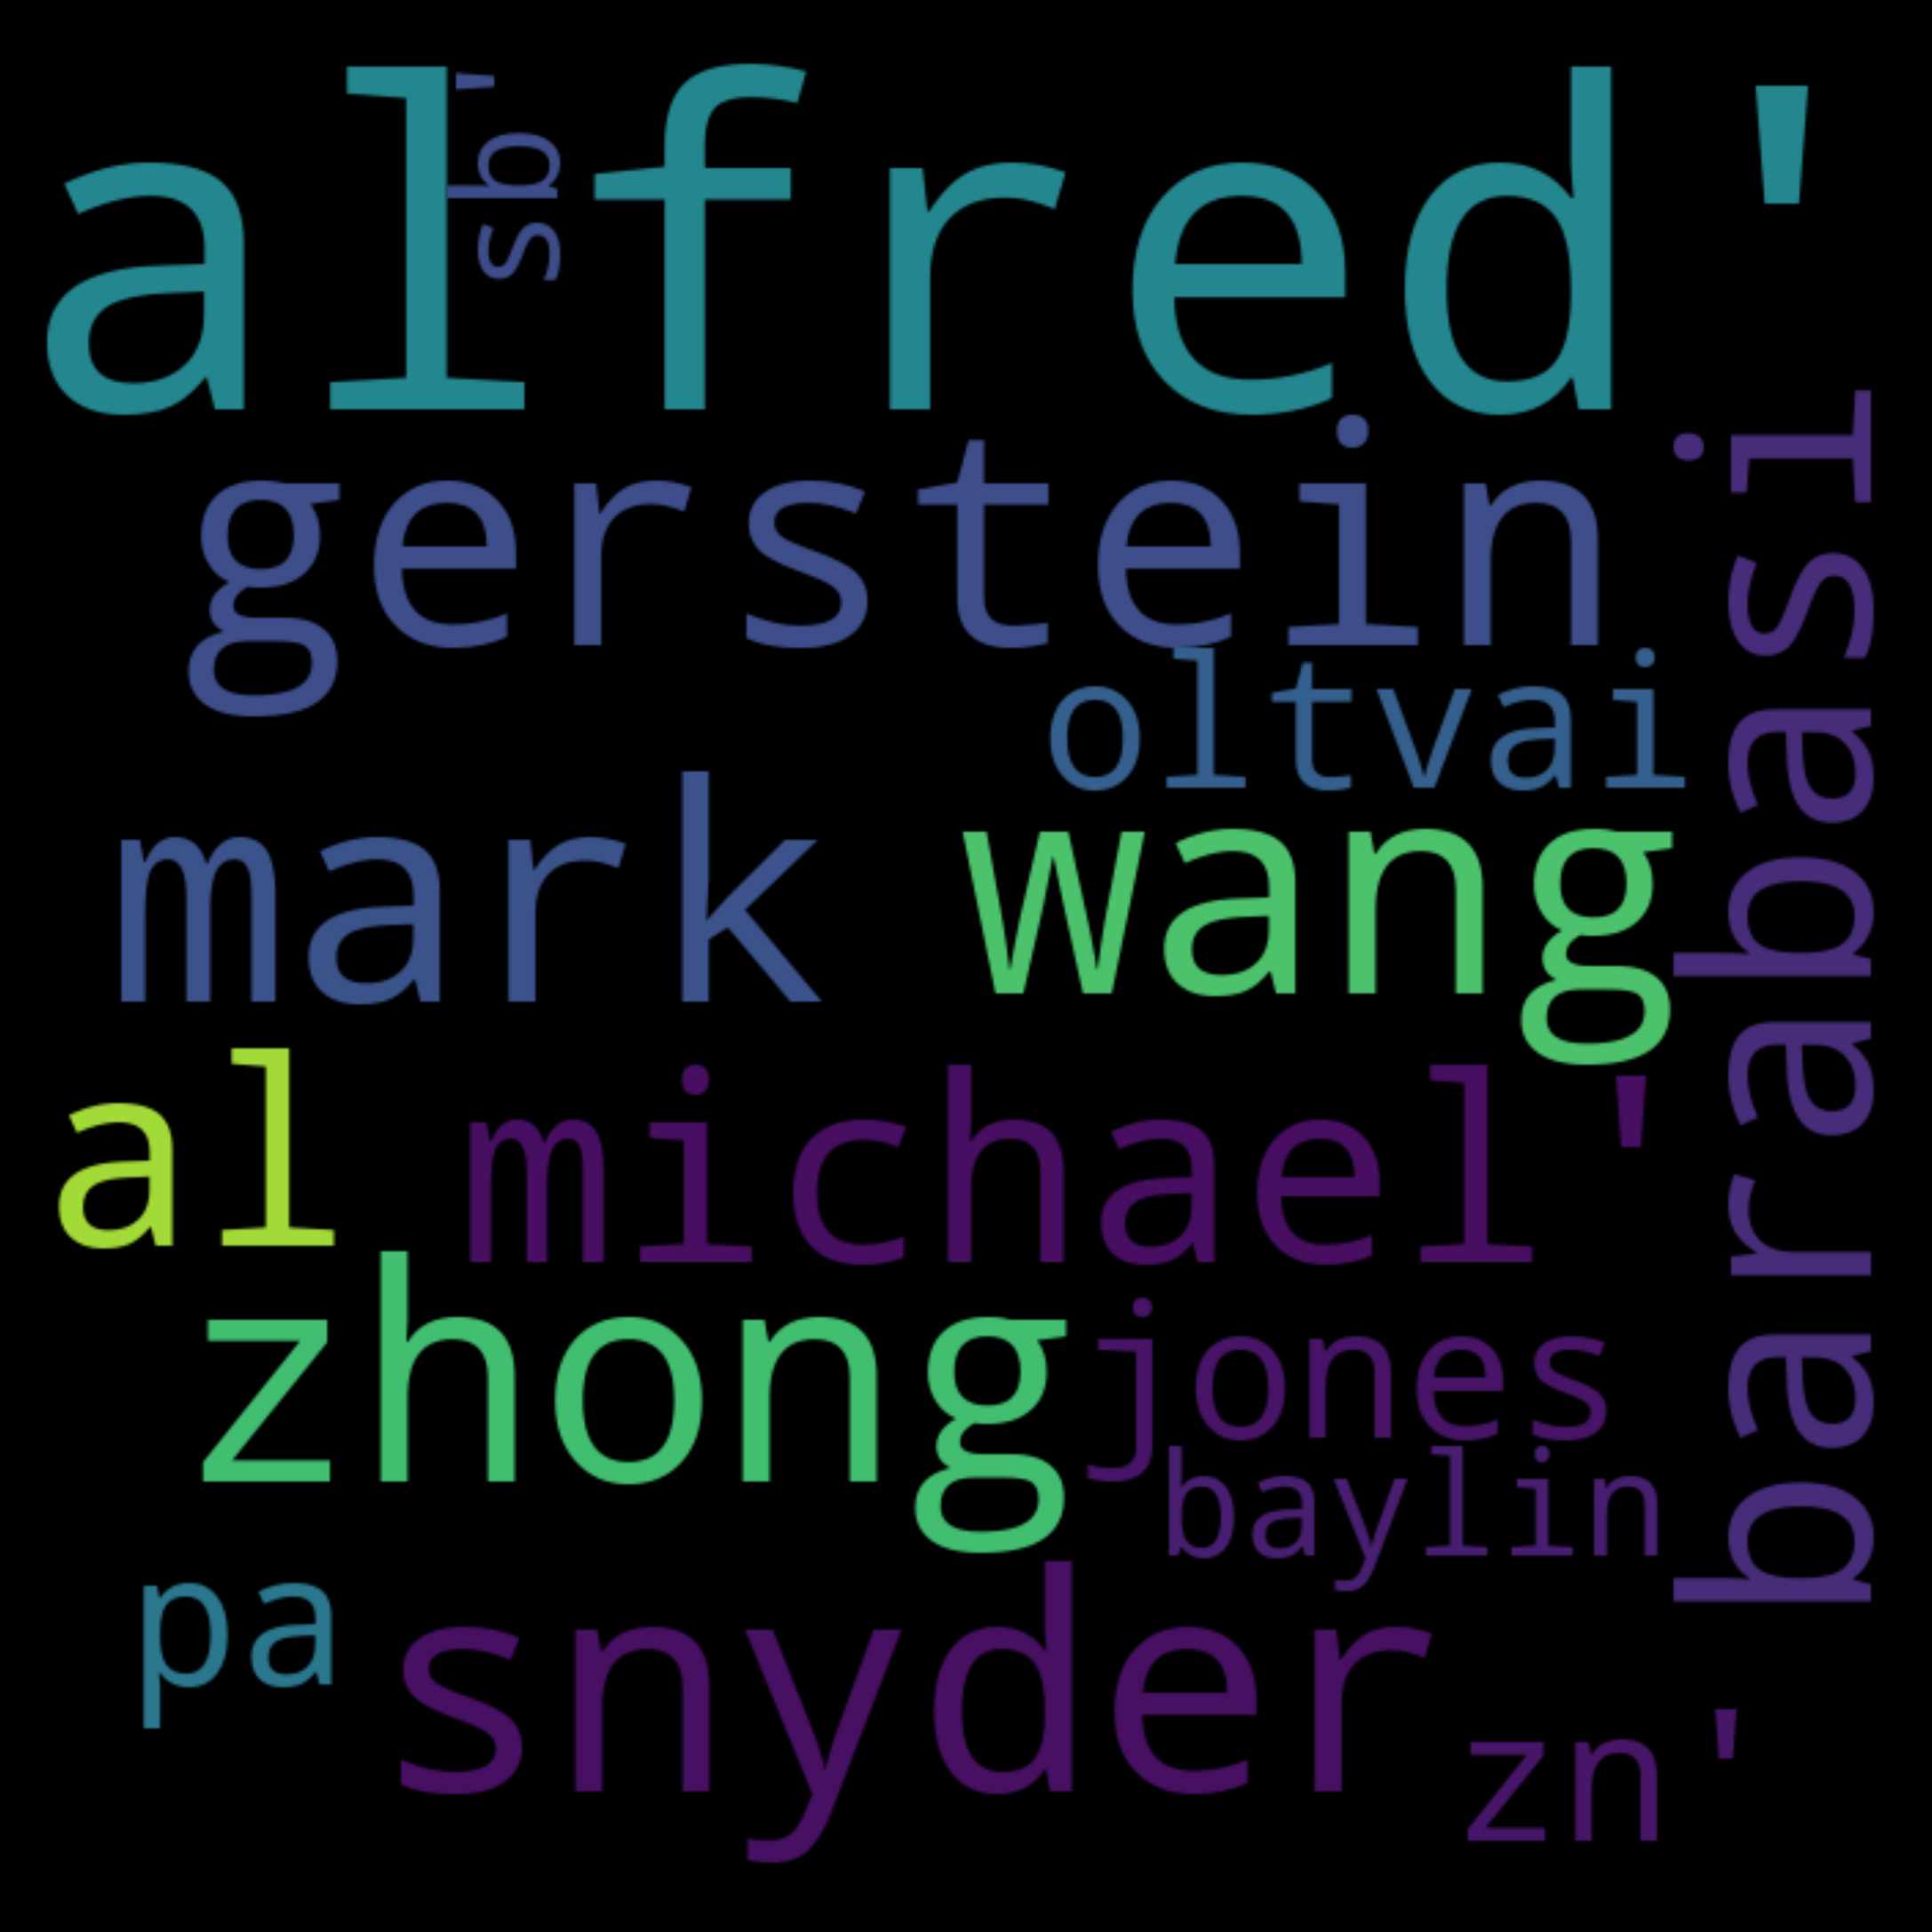

In [13]:
from wordcloud import WordCloud, STOPWORDS
text = df.finalcleaned_authors.values
wordcloud = WordCloud(
    width = 700,
    height = 700,
    max_font_size = 200,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [14]:
#traindf = df[["finalcleaned_title", "Average per Year","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","Total Citations"]]

traindf = df[["finalcleaned_authors", "Average per Year", "Total Citations"]]
traindf.head()

,finalcleaned_authors,Average per Year,Total Citations
0,wang zhong gerstein mark snyder michael,493.09,5424
1,barabasi al oltvai zn,262.63,4202
2,jones pa baylin sb,214.17,3855
3,metzker michael,339.50,3395
4,he hannon gj,208.94,3343


In [15]:
traindf["Total Citations"].describe()

count    3121.000000
mean      115.244473
std       284.517875
min         0.000000
25%         0.000000
50%         2.000000
75%       130.000000
max      5424.000000
Name: Total Citations, dtype: float64

In [16]:
traindf["Total Citations"].mean()
traindf["Category"] = np.where(traindf["Total Citations"]>traindf["Total Citations"].median(), "Top_half", "Bottom_half")
traindf.head()

<ipython-input-16-6de7f767916d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf["Category"] = np.where(traindf["Total Citations"]>traindf["Total Citations"].median(), "Top_half", "Bottom_half")


,finalcleaned_authors,Average per Year,Total Citations,Category
0,wang zhong gerstein mark snyder michael,493.09,5424,Top_half
1,barabasi al oltvai zn,262.63,4202,Top_half
2,jones pa baylin sb,214.17,3855,Top_half
3,metzker michael,339.50,3395,Top_half
4,he hannon gj,208.94,3343,Top_half


In [17]:
traindf.groupby(["Category"]).size()

Category
Bottom_half    1636
Top_half       1485
dtype: int64

### TF-IDF Vectorizer vs. Count Vectorizer
### TF-IDF: weights down common words, gives more importance to rare words
### Count Vectorizer: convert a collection of text to a matrix of the counts of occurences of each word in the document

In [18]:
#set up X and y
X_train = traindf['finalcleaned_authors']
y_train = traindf['Category']

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=1)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initalise the vectoriser 
tvec = TfidfVectorizer()
# fit the training data on the model
tvec.fit(X_train)

#transform training data into sparse matrix
X_train_tvec = tvec.transform(X_train)

# cross val score/ predict
tvec_score = cross_val_score(lr, X_train_tvec, y_train, cv=3)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# initalise the vectoriser 
cvec = CountVectorizer()
# fit the training data on the model
cvec.fit(X_train)

#transform training data into sparse matrix
X_train_cvec = cvec.transform(X_train)

# cross val score/ predict
cvec_score = cross_val_score(lr, X_train_cvec, y_train, cv=3 )

In [21]:
df_cvec = pd.DataFrame(X_train_cvec.todense(),columns=cvec.get_feature_names())
print('TF-IDF Vectorizer Score:', tvec_score.mean())
print('Count Vectorizer Score:', cvec_score.mean())
acc_list = []
acc_list.append(cvec_score.mean())
acc_list.append(tvec_score.mean())

# DataFrame Accuracy 
acc_df = pd.DataFrame()
acc_df['params']=['Count', 'TF-IDF']
acc_df['scores']= acc_list
acc_df

TF-IDF Vectorizer Score: 0.7767109411561862
Count Vectorizer Score: 0.8167510283504519


,params,scores
0,Count,0.816751
1,TF-IDF,0.776711


## Logistic Regression with Count Vectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

xtrain, xval, ytrain, yval = train_test_split(traindf['finalcleaned_authors'], traindf['Category'], test_size=0.2, random_state=9)

# initalise the vectoriser 
cvec = CountVectorizer()

# fit the training data on the model, transform training data into sparse matrix
xtrain_cvec = cvec.fit_transform(xtrain)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(xtrain_cvec, ytrain)


cvec_score = cross_val_score(lr, xtrain_cvec, ytrain, cv=10)
#print(cvec_score)
df_cvec = pd.DataFrame(xtrain_cvec.toarray(),columns=cvec.get_feature_names())
print(df_cvec.head())

cvec_score = cross_val_score(lr, X_train_cvec, y_train, cv=10)
print('Score:',tvec_score.mean())

   aa  aaron  aarron  abbasi  abd  abdallah  abecasis  abel  abiola  abrahams  \
0   0      0       0       0    0         0         0     0       0         0   
1   0      0       0       0    0         0         0     0       0         0   
2   0      0       0       0    0         0         0     0       0         0   
3   0      0       0       0    0         0         0     0       0         0   
4   0      0       0       0    0         0         0     0       0         0   

   ...  zollner  zon  zondervan  zoran  zou  zoya  zuben  zuber  zuccala  \
0  ...        0    0          0      0    0     0      0      0        0   
1  ...        0    0          0      0    0     0      0      0        0   
2  ...        0    0          0      0    0     0      0      0        0   
3  ...        0    0          0      0    0     0      0      0        0   
4  ...        0    0          0      0    0     0      0      0        0   

   zuniga  
0       0  
1       0  
2       0  
3       

In [24]:
predictions = classifier.predict(xtrain_cvec)

pred = pd.DataFrame()
pred["Predictions"] = predictions[:10]
pred["Actual"] =  ytrain[:10].tolist()
pred

,Predictions,Actual
0,Bottom_half,Bottom_half
1,Top_half,Top_half
2,Top_half,Top_half
3,Bottom_half,Top_half
4,Top_half,Top_half
5,Bottom_half,Top_half
6,Top_half,Top_half
7,Top_half,Top_half
8,Bottom_half,Bottom_half
9,Top_half,Top_half
